# Plots of mean tracers

In [1]:
# load modules 

import numpy as np
import xarray as xr
from xmitgcm import open_mdsdataset
from matplotlib import pyplot as plt
from matplotlib import colors, ticker, cm
from matplotlib.colors import LogNorm
%matplotlib inline
import os 
from xgcm import Grid
from funcs import *

In [2]:
Lcoarse = 50e3

In [3]:
list_trac = ['TRAC01', 'TRAC02', 'TRAC03', 'TRAC04', 'TRAC05', 
            'TRAC06', 'TRAC07', 'TRAC08', 'TRAC09', 'TRAC10', 
            'TRAC11', 'TRAC12', 'TRAC13', 'TRAC14', 'TRAC15', 
            'TRAC16', 'TRAC17', 'TRAC18', 'TRAC19', 'TRAC20']

In [4]:
Model_Tav = xr.open_dataset('./outputs_ncfiles/Model_Tav.nc')
Trac_Tav = xr.open_dataset('./outputs_ncfiles/Trac_Tav.nc')

In [5]:
diff_tensor = xr.open_dataset('./outputs_ncfiles/diff_tensor_'+str(int(Lcoarse//1e3))+'km.nc')
Trac_coarse = xr.open_dataset('./outputs_ncfiles/Trac_coarse_'+str(int(Lcoarse//1e3))+'km')
Vels_coarse = xr.open_dataset('./outputs_ncfiles/Vels_coarse_'+str(int(Lcoarse//1e3))+'km')
T_coarse    = xr.open_dataset('./outputs_ncfiles/T_coarse_'+str(int(Lcoarse//1e3))+'km')

In [6]:
def flux_reconstruct(tensor, flux, grads):

    recUflux = -(tensor.sel(i=0, j=0)*grads.dCdx + tensor.sel(i=0, j=1)*grads.dCdy + tensor.sel(i=0, j=2)*grads.dCdz)
    recVflux = -(tensor.sel(i=1, j=0)*grads.dCdx + tensor.sel(i=1, j=1)*grads.dCdy + tensor.sel(i=1, j=2)*grads.dCdz)
    recWflux = -(tensor.sel(i=2, j=0)*grads.dCdx + tensor.sel(i=2, j=1)*grads.dCdy + tensor.sel(i=2, j=2)*grads.dCdz)

    errU = np.abs(flux.UpCp - recUflux)/np.abs(flux.UpCp)
    errV = np.abs(flux.VpCp - recVflux)/np.abs(flux.VpCp)
    errW = np.abs(flux.WpCp - recWflux)/np.abs(flux.WpCp)
    
    flux_rec=xr.Dataset({'UpCp':recUflux, 'VpCp':recVflux, 'WpCp':recWflux,
                                'errU':errU, 'errV':errV, 'errW':errW})
    
    return flux_rec

In [7]:
X = Trac_Tav.XC
Y = Trac_Tav.YC
Z = Trac_Tav.Z

In [8]:
Xcoarse = Trac_coarse.XCcoarse
Ycoarse = Trac_coarse.YCcoarse
Z = Trac_Tav.Z

In [9]:
Lx = 2000.e3
H = 2985.
C1 = Z/Z*Y/Lx*X/X
C2 = -Z/H*Y/Y*X/X
C3 =  Z/Z*Y/Y*np.cos(2 *np.pi *X/Lx)

# Tracers for 3D setup (with ridge in the middle.)
C1 = yg/Lx
C2 = (-zg)/H
C3 = np.cos(2*np.pi*xg/Lx) 
C4 = np.sin(2*np.pi*xg/Lx)
C5 = np.sin(4*np.pi*xg/Lx)
C6 = np.sin(np.pi*yg/Lx)
C7 = np.cos(2*np.pi*yg/Lx)
C8 = np.sin(2*np.pi*yg/Lx)
C9 = np.cos(np.pi*zg/H)
C10 = np.sin(np.pi*zg/H)

In [10]:
params = {
   'axes.labelsize': 12,
   'font.size': 12,
   'legend.fontsize': 12,
   'xtick.labelsize': 12,
   'ytick.labelsize': 12,
   'text.usetex': False,
   'figure.figsize': [4.5, 4.5]
   }
plt.rcParams.update(params)

/home/dbalwada/.conda/envs/pangeo/lib/python3.6/site-packages/matplotlib/contour.py:1000: UserWarning: The following kwargs were not used by contour: 'rasterized'
  s)


Text(0, 0.5, 'C$_1$')

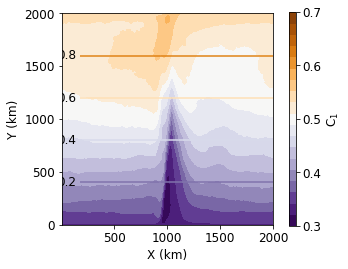

In [11]:
# Value restored to and equilibirum overlaid in same color (when they are similar the colors mix, and can't see contours)

fig, ax = plt.subplots(1,1)

im = ax.contourf(X/1e3, Y/1e3, Trac_Tav.TRAC02.sel(Z=-1500, method='nearest'), 
              vmin=0.3, vmax=0.7,levels=np.linspace(0.3,0.7,20), cmap='PuOr_r', rasterized=True)
im2 = ax.contour(X/1e3, Y/1e3, C1.sel(Z=-1500, method='nearest'), vmin=0, vmax=1, levels=np.linspace(0,1,6),
                      cmap='PuOr_r', rasterized=True)

fmt = {}
strs = np.linspace(0,1,6)
for l, s in zip(im2.levels, strs):
    fmt[l] = str('%1.1f' %s)

ax.clabel(im2, im2.levels[::1], fmt=fmt, colors='k')

ax.set_aspect('equal')
ax.set_xlabel('X (km)')
ax.set_ylabel('Y (km)')
ax.set_xticks([500, 1000, 1500, 2000])
ax.set_yticks([0, 500, 1000, 1500, 2000])

plt.tight_layout()

fig.subplots_adjust(right=0.85)
cbar_ax = fig.add_axes([0.9, 0.22, 0.02, 0.66])
fig.colorbar(im, cax=cbar_ax, ticks=np.linspace(0.3,0.7,5))
cbar_ax.set_ylabel('C$_1$')
#fig.savefig('C1.pdf', dpi=200,bbox_inches='tight')


Text(0, 0.5, 'C$_3$')

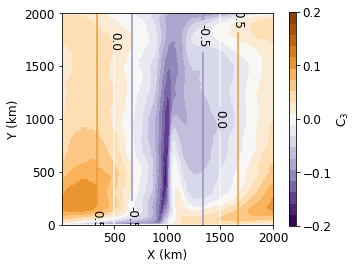

In [12]:
fig, ax = plt.subplots(1,1)

im = ax.contourf(X/1e3, Y/1e3, Trac_Tav.TRAC06.sel(Z=-1500, method='nearest'), 
              vmin=-0.2, vmax=0.2,levels=np.linspace(-0.2,0.2,20), cmap='PuOr_r', rasterized=True)
im2 = ax.contour(X/1e3, Y/1e3, C3.sel(Z=-1500, method='nearest'), vmin=-1, vmax=1, levels=np.linspace(-1,1,5),
                      cmap='PuOr_r', rasterized=True)

ax.set_aspect('equal')
ax.set_xlabel('X (km)')
ax.set_ylabel('Y (km)')
ax.set_xticks([500, 1000, 1500, 2000])
ax.set_yticks([0, 500, 1000, 1500, 2000])
plt.tight_layout()

fmt = {}
strs = np.linspace(-1,1,5)
for l, s in zip(im2.levels, strs):
    fmt[l] = str('%1.1f' %s)

ax.clabel(im2, im2.levels[::1], fmt=fmt, colors='k')


fig.subplots_adjust(right=0.85)
cbar_ax = fig.add_axes([0.9, 0.22, 0.02, 0.66])
fig.colorbar(im, cax=cbar_ax, ticks=np.linspace(-0.2,0.2,5))
cbar_ax.set_ylabel('C$_3$')
#fig.savefig('C3.pdf', dpi=200,bbox_inches='tight')

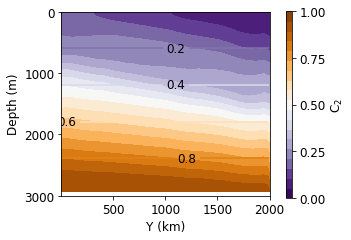

In [12]:
# Value restored to and equilibirum overlaid in same color (when they are similar the colors mix, and can't see contours)

fig, ax = plt.subplots(1,1,figsize=(4.5,3.5))

im = ax.contourf(Y/1e3, Z, Trac_Tav.TRAC04.sel(XC=0, method='nearest'), 
              vmin=0, vmax=1,levels=np.linspace(0,1,20), cmap='PuOr_r', rasterized=True)
im2 = ax.contour(Y/1e3, Z, C2.sel(XC=0, method='nearest'), vmin=0, vmax=1, levels=np.linspace(0,1,6),
                      cmap='PuOr_r', rasterized=True)

fmt = {}
strs = np.linspace(0,1,6)
for l, s in zip(im2.levels, strs):
    fmt[l] = str('%1.1f' %s)

ax.clabel(im2, im2.levels[::1], fmt=fmt, colors='k')

ax.set_xlabel('Y (km)')
ax.set_ylabel('Depth (m)')
ax.set_xticks([500, 1000, 1500, 2000])
            
ax.set_yticks([-3000,-2000, -1000,0])
ax.set_yticklabels([3000,2000, 1000,0])

plt.tight_layout()
fig.subplots_adjust(right=0.85)
cbar_ax = fig.add_axes([0.9, 0.19, 0.02, 0.74])
fig.colorbar(im, cax=cbar_ax, ticks=np.linspace(0.,1,5))
cbar_ax.set_ylabel('C$_2$')
fig.savefig('C2.pdf', dpi=200,bbox_inches='tight')

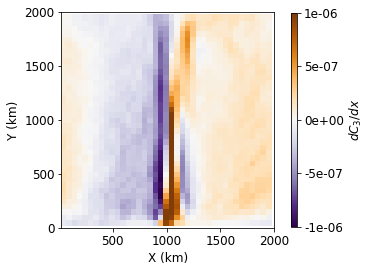

In [13]:
fig, ax = plt.subplots(1,1)

im = ax.pcolormesh(Xcoarse/1e3, Ycoarse/1e3, Trac_coarse.TRAC06_X.sel(Z=-1500, method='nearest'), 
                vmin=-1e-6, vmax=1e-6, cmap='PuOr_r', rasterized=True)
#im2 = ax.contour(X/1e3, Y/1e3, C3.sel(Z=-1500, method='nearest'), vmin=-1, vmax=1, levels=np.linspace(-1,1,5),
#                      cmap='PuOr_r', rasterized=True)

ax.set_aspect('equal')
ax.set_xlabel('X (km)')
ax.set_ylabel('Y (km)')
ax.set_xticks([500, 1000, 1500, 2000])
ax.set_yticks([0, 500, 1000, 1500, 2000])
plt.tight_layout()


fig.subplots_adjust(right=0.85)
cbar_ax = fig.add_axes([0.9, 0.22, 0.02, 0.66])
fig.colorbar(im, cax=cbar_ax, format='%.0e', ticks = np.linspace(-1e-6,1e-6,5))
cbar_ax.set_ylabel('$dC_3/dx$')
fig.savefig('C3_X.pdf', dpi=200,bbox_inches='tight')

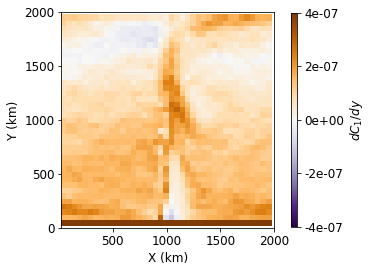

In [14]:
fig, ax = plt.subplots(1,1)

im = ax.pcolormesh(Xcoarse/1e3, Ycoarse/1e3, Trac_coarse.TRAC02_Y.sel(Z=-1500, method='nearest'), 
                vmin=-4e-7, vmax=4e-7, cmap='PuOr_r', rasterized=True)
#im2 = ax.contour(X/1e3, Y/1e3, C3.sel(Z=-1500, method='nearest'), vmin=-1, vmax=1, levels=np.linspace(-1,1,5),
#                      cmap='PuOr_r', rasterized=True)

ax.set_aspect('equal')
ax.set_xlabel('X (km)')
ax.set_ylabel('Y (km)')
ax.set_xticks([500, 1000, 1500, 2000])
ax.set_yticks([0, 500, 1000, 1500, 2000])
plt.tight_layout()


fig.subplots_adjust(right=0.85)
cbar_ax = fig.add_axes([0.9, 0.22, 0.02, 0.66])
fig.colorbar(im, cax=cbar_ax, format='%.0e', ticks = np.linspace(-4e-7,4e-7,5))
cbar_ax.set_ylabel('$dC_1/dy$')
fig.savefig('C1_Y.pdf', dpi=200,bbox_inches='tight')

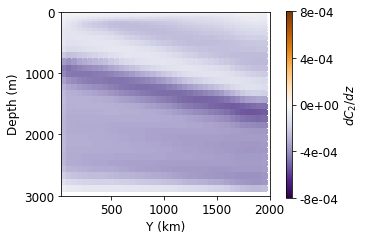

In [15]:
fig, ax = plt.subplots(1,1,figsize=(4.5,3.5))

im = ax.pcolormesh(Xcoarse/1e3, Z, Trac_coarse.TRAC04_Z.sel(XCcoarse=0, method='nearest'), 
                vmin=-8e-4, vmax=8e-4, cmap='PuOr_r', rasterized=True)

ax.set_xlabel('Y (km)')
ax.set_ylabel('Depth (m)')
ax.set_xticks([500, 1000, 1500, 2000])
            
ax.set_yticks([-3000,-2000, -1000,0])
ax.set_yticklabels([3000,2000, 1000,0])

plt.tight_layout()
fig.subplots_adjust(right=0.85)
cbar_ax = fig.add_axes([0.9, 0.19, 0.02, 0.74])
fig.colorbar(im, cax=cbar_ax, format='%.0e',ticks=np.linspace(-8e-4,8e-4,5))
cbar_ax.set_ylabel('$dC_2/dz$')
fig.savefig('C2_Z.pdf', dpi=200,bbox_inches='tight')

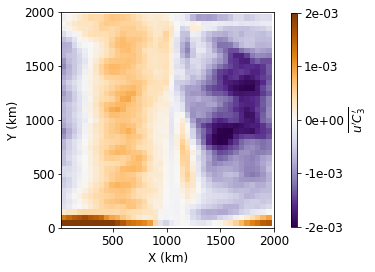

In [16]:
fig, ax = plt.subplots(1,1)

im = ax.pcolormesh(Xcoarse/1e3, Ycoarse/1e3, Trac_coarse.UpTRAC06p.sel(Z=-1500, method='nearest'), 
                vmin=-2e-3, vmax=2e-3,cmap='PuOr_r', rasterized=True)
#im2 = ax.contour(X/1e3, Y/1e3, C3.sel(Z=-1500, method='nearest'), vmin=-1, vmax=1, levels=np.linspace(-1,1,5),
#                      cmap='PuOr_r', rasterized=True)

ax.set_aspect('equal')
ax.set_xlabel('X (km)')
ax.set_ylabel('Y (km)')
ax.set_xticks([500, 1000, 1500, 2000])
ax.set_yticks([0, 500, 1000, 1500, 2000])
plt.tight_layout()


fig.subplots_adjust(right=0.85)
cbar_ax = fig.add_axes([0.9, 0.22, 0.02, 0.66])
fig.colorbar(im, cax=cbar_ax, format='%.0e', ticks=np.linspace(-2e-3,2e-3,5))
cbar_ax.set_ylabel('$\overline{u\' C_3\'}$')
fig.savefig('uC3.pdf', dpi=200,bbox_inches='tight')

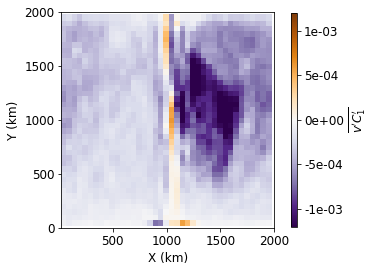

In [17]:
fig, ax = plt.subplots(1,1)

im = ax.pcolormesh(Xcoarse/1e3, Ycoarse/1e3, Trac_coarse.VpTRAC02p.sel(Z=-1500, method='nearest'), 
                vmin=-12e-4, vmax=12e-4,cmap='PuOr_r', rasterized=True)
#im2 = ax.contour(X/1e3, Y/1e3, C3.sel(Z=-1500, method='nearest'), vmin=-1, vmax=1, levels=np.linspace(-1,1,5),
#                      cmap='PuOr_r', rasterized=True)

ax.set_aspect('equal')
ax.set_xlabel('X (km)')
ax.set_ylabel('Y (km)')
ax.set_xticks([500, 1000, 1500, 2000])
ax.set_yticks([0, 500, 1000, 1500, 2000])
plt.tight_layout()


fig.subplots_adjust(right=0.85)
cbar_ax = fig.add_axes([0.9, 0.22, 0.02, 0.66])
fig.colorbar(im, cax=cbar_ax, format='%.0e', ticks=np.linspace(-1e-3,1e-3,5))
cbar_ax.set_ylabel('$\overline{v\' C_1\'}$')
fig.savefig('vC1.pdf', dpi=200,bbox_inches='tight')

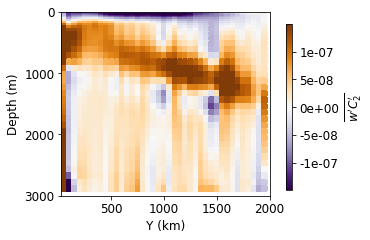

In [61]:
fig, ax = plt.subplots(1,1,figsize=(4.5,3.5))

im = ax.pcolormesh(Ycoarse/1e3, Z, Trac_coarse.WpTRAC04p.sel(XCcoarse =0, method='nearest'), 
                vmin=-15e-8, vmax=15e-8,cmap='PuOr_r', rasterized=True)
#im2 = ax.contour(X/1e3, Y/1e3, C3.sel(Z=-1500, method='nearest'), vmin=-1, vmax=1, levels=np.linspace(-1,1,5),
#                      cmap='PuOr_r', rasterized=True)


ax.set_xlabel('Y (km)')
ax.set_ylabel('Depth (m)')
ax.set_xticks([500, 1000, 1500, 2000])
ax.set_yticks([-3000,-2000, -1000,0])
ax.set_yticklabels([3000,2000, 1000,0])
plt.tight_layout()


fig.subplots_adjust(right=0.85)
cbar_ax = fig.add_axes([0.9, 0.22, 0.02, 0.66])
fig.colorbar(im, cax=cbar_ax, format='%.0e', ticks=np.linspace(-1e-7,1e-7,5))
cbar_ax.set_ylabel('$\overline{w\' C_2\'}$')
fig.savefig('wC2.pdf', dpi=200,bbox_inches='tight')

In [14]:
# analyzed flux 
[UpCp, VpCp, WpCp] = get_flux_arrays(Trac_coarse, list_trac)
[dCdx, dCdy, dCdz]= get_grad_arrays(Trac_coarse, list_trac)
flux = xr.Dataset({'UpCp':UpCp, 'VpCp':VpCp, 'WpCp':WpCp})
grads = xr.Dataset({'dCdx':dCdx, 'dCdy':dCdy, 'dCdz':dCdz})

In [15]:
flux_rec =flux_reconstruct( diff_tensor.Kcorr, flux, grads)

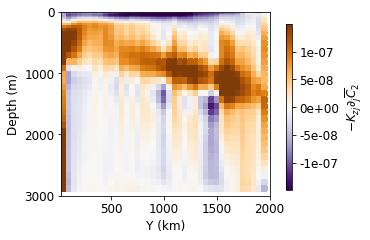

In [65]:
fig, ax = plt.subplots(1,1,figsize=(4.5,3.5))

im = ax.pcolormesh(Ycoarse/1e3, Z, flux_rec.WpCp.sel(tracer_num=4, XCcoarse =0, method='nearest'), 
                vmin=-15e-8, vmax=15e-8,cmap='PuOr_r', rasterized=True)
#im2 = ax.contour(X/1e3, Y/1e3, C3.sel(Z=-1500, method='nearest'), vmin=-1, vmax=1, levels=np.linspace(-1,1,5),
#                      cmap='PuOr_r', rasterized=True)


ax.set_xlabel('Y (km)')
ax.set_ylabel('Depth (m)')
ax.set_xticks([500, 1000, 1500, 2000])
ax.set_yticks([-3000,-2000, -1000,0])
ax.set_yticklabels([3000,2000, 1000,0])
plt.tight_layout()


fig.subplots_adjust(right=0.85)
cbar_ax = fig.add_axes([0.9, 0.22, 0.02, 0.66])
fig.colorbar(im, cax=cbar_ax, format='%.0e', ticks=np.linspace(-1e-7,1e-7,5))
cbar_ax.set_ylabel('$ - K_{zj} \partial_j \overline{C}_2$')
fig.savefig('kC2z.pdf', dpi=200,bbox_inches='tight')

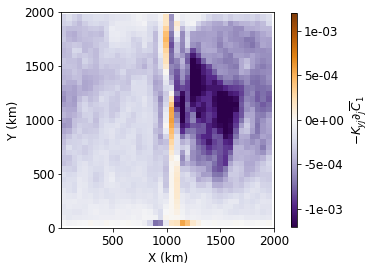

In [66]:
fig, ax = plt.subplots(1,1)

im = ax.pcolormesh(Xcoarse/1e3, Ycoarse/1e3, flux_rec.VpCp.sel(tracer_num=2, Z=-1500, method='nearest'), 
                vmin=-12e-4, vmax=12e-4,cmap='PuOr_r', rasterized=True)
#im2 = ax.contour(X/1e3, Y/1e3, C3.sel(Z=-1500, method='nearest'), vmin=-1, vmax=1, levels=np.linspace(-1,1,5),
#                      cmap='PuOr_r', rasterized=True)

ax.set_aspect('equal')
ax.set_xlabel('X (km)')
ax.set_ylabel('Y (km)')
ax.set_xticks([500, 1000, 1500, 2000])
ax.set_yticks([0, 500, 1000, 1500, 2000])
plt.tight_layout()


fig.subplots_adjust(right=0.85)
cbar_ax = fig.add_axes([0.9, 0.22, 0.02, 0.66])
fig.colorbar(im, cax=cbar_ax, format='%.e', ticks=np.linspace(-1e-3,1e-3,5))
cbar_ax.set_ylabel('$ - K_{yj} \partial_j \overline{C}_1$')
fig.savefig('kC1y.pdf', dpi=200,bbox_inches='tight')

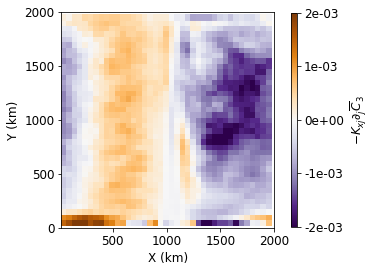

In [67]:
fig, ax = plt.subplots(1,1)

im = ax.pcolormesh(Xcoarse/1e3, Ycoarse/1e3, flux_rec.UpCp.sel(tracer_num=6, Z=-1500, method='nearest'), 
                vmin=-2e-3, vmax=2e-3,cmap='PuOr_r', rasterized=True)
#im2 = ax.contour(X/1e3, Y/1e3, C3.sel(Z=-1500, method='nearest'), vmin=-1, vmax=1, levels=np.linspace(-1,1,5),
#                      cmap='PuOr_r', rasterized=True)

ax.set_aspect('equal')
ax.set_xlabel('X (km)')
ax.set_ylabel('Y (km)')
ax.set_xticks([500, 1000, 1500, 2000])
ax.set_yticks([0, 500, 1000, 1500, 2000])
plt.tight_layout()


fig.subplots_adjust(right=0.85)
cbar_ax = fig.add_axes([0.9, 0.22, 0.02, 0.66])
fig.colorbar(im, cax=cbar_ax, format='%.0e', ticks=np.linspace(-2e-3,2e-3,5))
cbar_ax.set_ylabel('$ - K_{xj} \partial_j \overline{C}_3$')
fig.savefig('kC3x.pdf', dpi=200,bbox_inches='tight')

# Are errors large in regions of negative diffusivity 

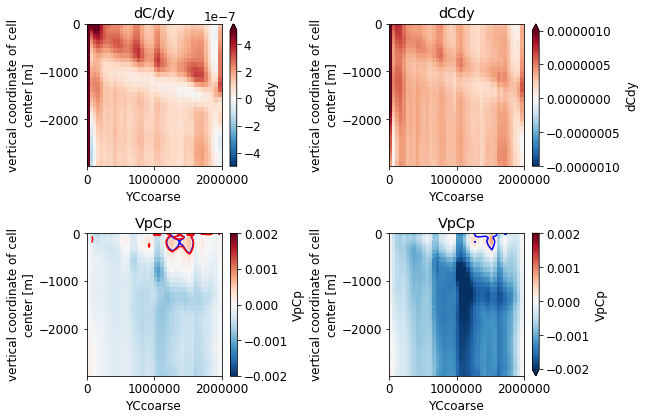

In [19]:
xloc=1900e3

plt.figure(figsize=(9,6))
plt.subplot(221)
dCdy.sel(tracer_num=2, XCcoarse=xloc, method='nearest').plot(vmin=-5e-7)
plt.title('dC/dy')

plt.subplot(222)
dCdy.sel(tracer_num=1, XCcoarse=xloc, method='nearest').plot(vmin=-1e-6)
plt.title('dCdy')

plt.subplot(223)
VpCp.sel(tracer_num=2, XCcoarse=xloc, method='nearest').plot(vmin=-2e-3)
plt.contour(Ycoarse, Z,diff_tensor.Kslow.where(T_coarse.hFacCcoarse==1.).sel(
                    XCcoarse=xloc, method='nearest').isel(i=1, j=1), 
             levels=[0], colors='b')
plt.contour(Ycoarse, Z,diff_tensor.eigvalsSTcorr.where(T_coarse.hFacCcoarse==1.).sel(
                    XCcoarse=xloc, method='nearest').isel(ii=1), 
             levels=[0], colors='r')
plt.title('VpCp')

plt.subplot(224)
VpCp.sel(tracer_num=1, XCcoarse=xloc, method='nearest').plot(vmin=-2e-3)
plt.contour(Ycoarse, Z,diff_tensor.Kfast.where(T_coarse.hFacCcoarse==1.).sel(
                    XCcoarse=xloc, method='nearest').isel(i=1, j=1), 
             levels=[0], colors='b')
plt.title('VpCp')


plt.tight_layout()

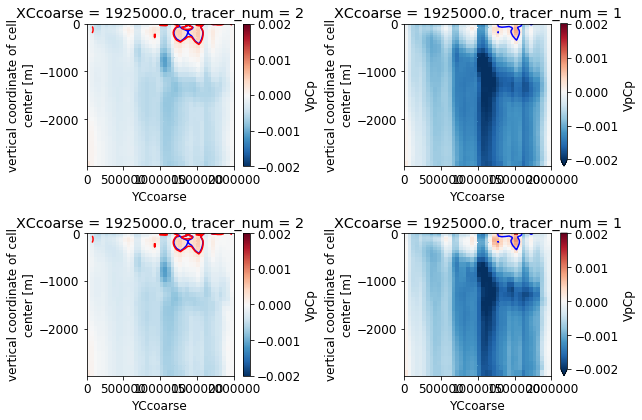

In [22]:
xloc=1900e3

plt.figure(figsize=(9,6))
plt.subplot(221)
VpCp.sel(tracer_num=2, XCcoarse=xloc, method='nearest').plot(vmin=-2e-3)
plt.contour(Ycoarse, Z,diff_tensor.Kslow.where(T_coarse.hFacCcoarse==1.).sel(
                    XCcoarse=xloc, method='nearest').isel(i=1, j=1), 
             levels=[0], colors='b')
plt.contour(Ycoarse, Z,diff_tensor.eigvalsSTcorr.where(T_coarse.hFacCcoarse==1.).sel(
                    XCcoarse=xloc, method='nearest').isel(ii=1), 
             levels=[0], colors='r')

plt.subplot(222)
VpCp.sel(tracer_num=1, XCcoarse=xloc, method='nearest').plot(vmin=-2e-3)
plt.contour(Ycoarse, Z,diff_tensor.Kfast.where(T_coarse.hFacCcoarse==1.).sel(
                    XCcoarse=xloc, method='nearest').isel(i=1, j=1), 
             levels=[0], colors='b')
plt.subplot(223)
flux_rec.VpCp.sel(tracer_num=2, XCcoarse=xloc, method='nearest').plot(vmin=-2e-3)
plt.contour(Ycoarse, Z,diff_tensor.Kslow.where(T_coarse.hFacCcoarse==1.).sel(
                    XCcoarse=xloc, method='nearest').isel(i=1, j=1), 
             levels=[0], colors='b')
plt.contour(Ycoarse, Z,diff_tensor.eigvalsSTcorr.where(T_coarse.hFacCcoarse==1.).sel(
                    XCcoarse=xloc, method='nearest').isel(ii=1), 
             levels=[0], colors='r')

plt.subplot(224)
flux_rec.VpCp.sel(tracer_num=1, XCcoarse=xloc, method='nearest').plot(vmin=-2e-3)
plt.contour(Ycoarse, Z,diff_tensor.Kfast.where(T_coarse.hFacCcoarse==1.).sel(
                    XCcoarse=xloc, method='nearest').isel(i=1, j=1), 
             levels=[0], colors='b')

plt.tight_layout()

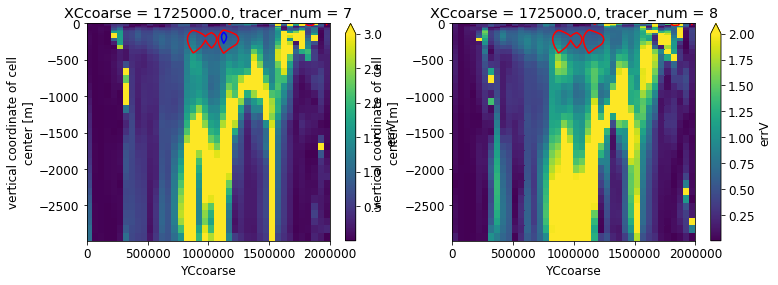

In [26]:
plt.figure(figsize=(12,4))

xloc=1700e3
n=7
plt.subplot(121)
flux_rec.errV.sel(tracer_num=n, XCcoarse=xloc, method='nearest').plot(vmax=3)
plt.contour(Ycoarse, Z,diff_tensor.Kfast.where(T_coarse.hFacCcoarse==1.).sel(
                    XCcoarse=xloc, method='nearest').isel(i=1, j=1), 
             levels=[0], colors='b')
plt.contour(Ycoarse, Z,diff_tensor.Kslow.where(T_coarse.hFacCcoarse==1.).sel(
                    XCcoarse=xloc, method='nearest').isel(i=1, j=1), 
             levels=[0], colors='r')

plt.subplot(122)
flux_rec.errV.sel(tracer_num=n+1, XCcoarse=xloc, method='nearest').plot(vmax=2)
plt.contour(Ycoarse, Z,diff_tensor.Kslow.where(T_coarse.hFacCcoarse==1.).sel(
                    XCcoarse=xloc, method='nearest').isel(i=1, j=1), 
             levels=[0], colors='r')



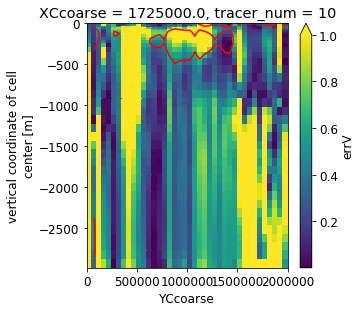

In [39]:
flux_rec.errV.sel(tracer_num=10, XCcoarse=xloc, method='nearest').plot(vmax=1)
plt.contour(Ycoarse, Z,diff_tensor.eigvalsSTcorr.where(T_coarse.hFacCcoarse==1.).sel(
                    XCcoarse=xloc, method='nearest').isel(ii=1), 
             levels=[0], colors='r')

(-600, 0)

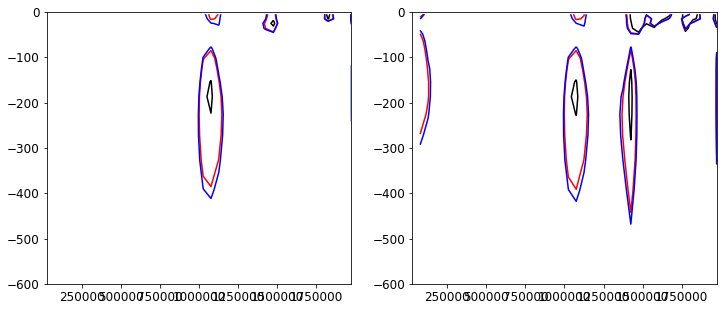

In [57]:
plt.figure(figsize=(12,5))

plt.subplot(121)
xloc=1800e3
plt.contour(Ycoarse, Z,diff_tensor.Kfast.where(T_coarse.hFacCcoarse==1.).sel(
                    XCcoarse=xloc, method='nearest').isel(i=1, j=1), 
             levels=[0], colors='k')
plt.contour(Ycoarse, Z,diff_tensor.Kslow.where(T_coarse.hFacCcoarse==1.).sel(
                    XCcoarse=xloc, method='nearest').isel(i=1, j=1), 
             levels=[0], colors='r')
plt.contour(Ycoarse, Z,diff_tensor.Kcorr.where(T_coarse.hFacCcoarse==1.).sel(
                    XCcoarse=xloc, method='nearest').isel(i=1, j=1), 
             levels=[0], colors='b')
plt.ylim([-600,0])

plt.subplot(122)
plt.contour(Ycoarse, Z,diff_tensor.eigvalsSTfast.where(T_coarse.hFacCcoarse==1.).sel(
                    XCcoarse=xloc, method='nearest').isel(ii=1), 
             levels=[0], colors='k')
plt.contour(Ycoarse, Z,diff_tensor.eigvalsSTslow.where(T_coarse.hFacCcoarse==1.).sel(
                    XCcoarse=xloc, method='nearest').isel(ii=1), 
             levels=[0], colors='r')
plt.contour(Ycoarse, Z,diff_tensor.eigvalsSTcorr.where(T_coarse.hFacCcoarse==1.).sel(
                    XCcoarse=xloc, method='nearest').isel(ii=1,), 
             levels=[0], colors='b')
plt.ylim([-600,0])

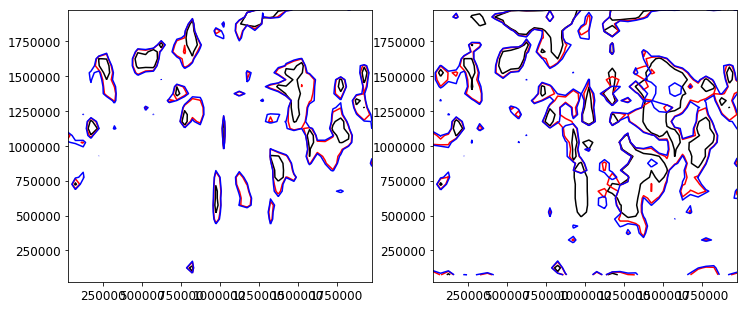

In [56]:
plt.figure(figsize=(12,5))

plt.subplot(121)
zloc=-200
plt.contour(Xcoarse, Ycoarse, diff_tensor.Kfast.where(T_coarse.hFacCcoarse==1.).sel(
                    Z=zloc, method='nearest').isel(i=1, j=1), 
             levels=[0], colors='k')
plt.contour(Xcoarse, Ycoarse, diff_tensor.Kslow.where(T_coarse.hFacCcoarse==1.).sel(
                     Z=zloc, method='nearest').isel(i=1, j=1), 
             levels=[0], colors='r')
plt.contour(Xcoarse, Ycoarse, diff_tensor.Kcorr.where(T_coarse.hFacCcoarse==1.).sel(
                     Z=zloc, method='nearest').isel(i=1, j=1), 
             levels=[0], colors='b')

plt.subplot(122)
plt.contour(Xcoarse, Ycoarse, diff_tensor.eigvalsSTfast.where(T_coarse.hFacCcoarse==1.).sel(
                    Z=zloc, method='nearest').isel(ii=1), 
             levels=[0], colors='k')
plt.contour(Xcoarse, Ycoarse, diff_tensor.eigvalsSTslow.where(T_coarse.hFacCcoarse==1.).sel(
                    Z=zloc, method='nearest').isel(ii=1), 
             levels=[0], colors='r')
plt.contour(Xcoarse, Ycoarse, diff_tensor.eigvalsSTcorr.where(T_coarse.hFacCcoarse==1.).sel(
                    Z=zloc, method='nearest').isel(ii=1,), 
             levels=[0], colors='b')

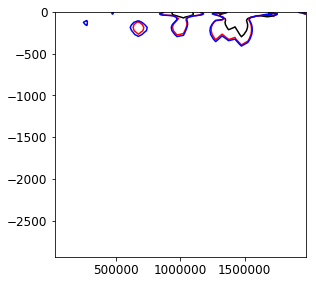

In [50]:
xloc=1600e3
plt.contour(Ycoarse, Z,diff_tensor.eigvalsSTfast.where(T_coarse.hFacCcoarse==1.).sel(
                    XCcoarse=xloc, method='nearest').isel(ii=1), 
             levels=[0], colors='k')
plt.contour(Ycoarse, Z,diff_tensor.eigvalsSTslow.where(T_coarse.hFacCcoarse==1.).sel(
                    XCcoarse=xloc, method='nearest').isel(ii=1), 
             levels=[0], colors='r')
plt.contour(Ycoarse, Z,diff_tensor.eigvalsSTcorr.where(T_coarse.hFacCcoarse==1.).sel(
                    XCcoarse=xloc, method='nearest').isel(ii=1,), 
             levels=[0], colors='b')

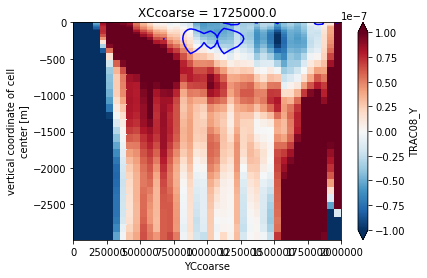

In [39]:
Trac_coarse.TRAC08_Y.sel(XCcoarse=xloc, method='nearest').plot(vmin=-1e-7)
plt.contour(Ycoarse, Z,diff_tensor.Kcorr.where(T_coarse.hFacCcoarse==1.).sel(
                    XCcoarse=xloc, method='nearest').isel(i=1, j=1), 
             levels=[0], colors='b')

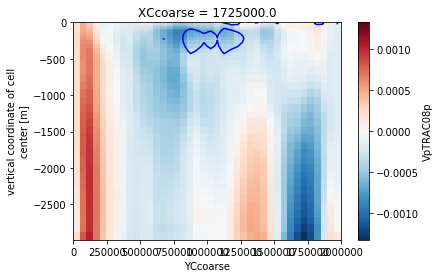

In [38]:
Trac_coarse.VpTRAC08p.sel(XCcoarse=xloc, method='nearest').plot()
plt.contour(Ycoarse, Z,diff_tensor.Kcorr.where(T_coarse.hFacCcoarse==1.).sel(
                    XCcoarse=xloc, method='nearest').isel(i=1, j=1), 
             levels=[0], colors='b')

In [ ]:
Trac_coarse.TRAC07_X.sel(XCcoarse=xloc, method='nearest').plot()